In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

sc.set_figure_params(dpi=100, dpi_save=300, facecolor='white')
plt.style.use('ggplot')
plt.rcParams['text.color'] = 'black'

In [17]:
batches = [2, 4, 6, 8]
ComGRN_data = [
    [1.9683,2.0034,2.1089,2.2846,2.144,2.0386,1.9683,2.2495,1.9683,2.2143],
    [1.8628,2.1792,2.0737,2.1792,2.2846,2.2143,2.0386,2.1792,2.1089,2.144],
    [2.0737,2.1792,2.144,2.1792,2.1792,2.1089,1.9331,2.2143,2.0034,2.2495],
    [2.1792,2.3901,2.2143,2.4252,2.2846,2.144,1.9683,2.3198,2.144,2.2846]
]

adv_data = [
    [1.9331,1.8628,1.898,2.144,2.0386,1.7925,1.9683,2.0386,1.7925,2.1792],
    [2.0034,1.9331,2.1089,2.2143,2.0034,2.0386,1.9683,2.1089,1.898,2.0034],
    [1.898,1.9331,1.9683,2.2143,2.1792,2.0386,2.0386,1.9683,1.7925,1.898],
    [1.9683,2.2143,1.9683,1.7925,1.8277,2.0034,1.9331,2.0034,1.9331,2.2495]
]

con_data = [
    [1.2302,0.7733,1.0544,1.6168,1.3708,0.8787,1.3356,1.1599,0.9841,1.3005],
    [1.0896,1.0193,1.3005,1.2302,1.3356,0.7381,1.0544,0.8084,0.9841,1.4411],
    [0.9138,1.4411,1.0193,1.2653,1.0896,0.8787,1.1247,0.703,1.0896,1.0896],
    [0.7381,0.8787,0.9841,1.4762,1.0193,1.0544,0.9138,0.9138,0.8436,1.1247]
]

sparse_data = [
    [1.5817,1.4059,1.4411,1.4059,1.3356,1.5114,1.3356,1.1599,1.3708,1.2653],
    [1.5817,1.2302,1.4059,1.3708,1.5817,1.4059,1.2302,1.2302,1.3356,1.0544],
    [1.6871,1.8277,1.5817,1.4059,1.652,1.4411,1.4762,1.3356,1.3356,1.4411],
    [1.5114,1.4059,1.7574,1.3708,1.5114,1.5114,1.3708,1.2653,1.3005,1.2302]
]

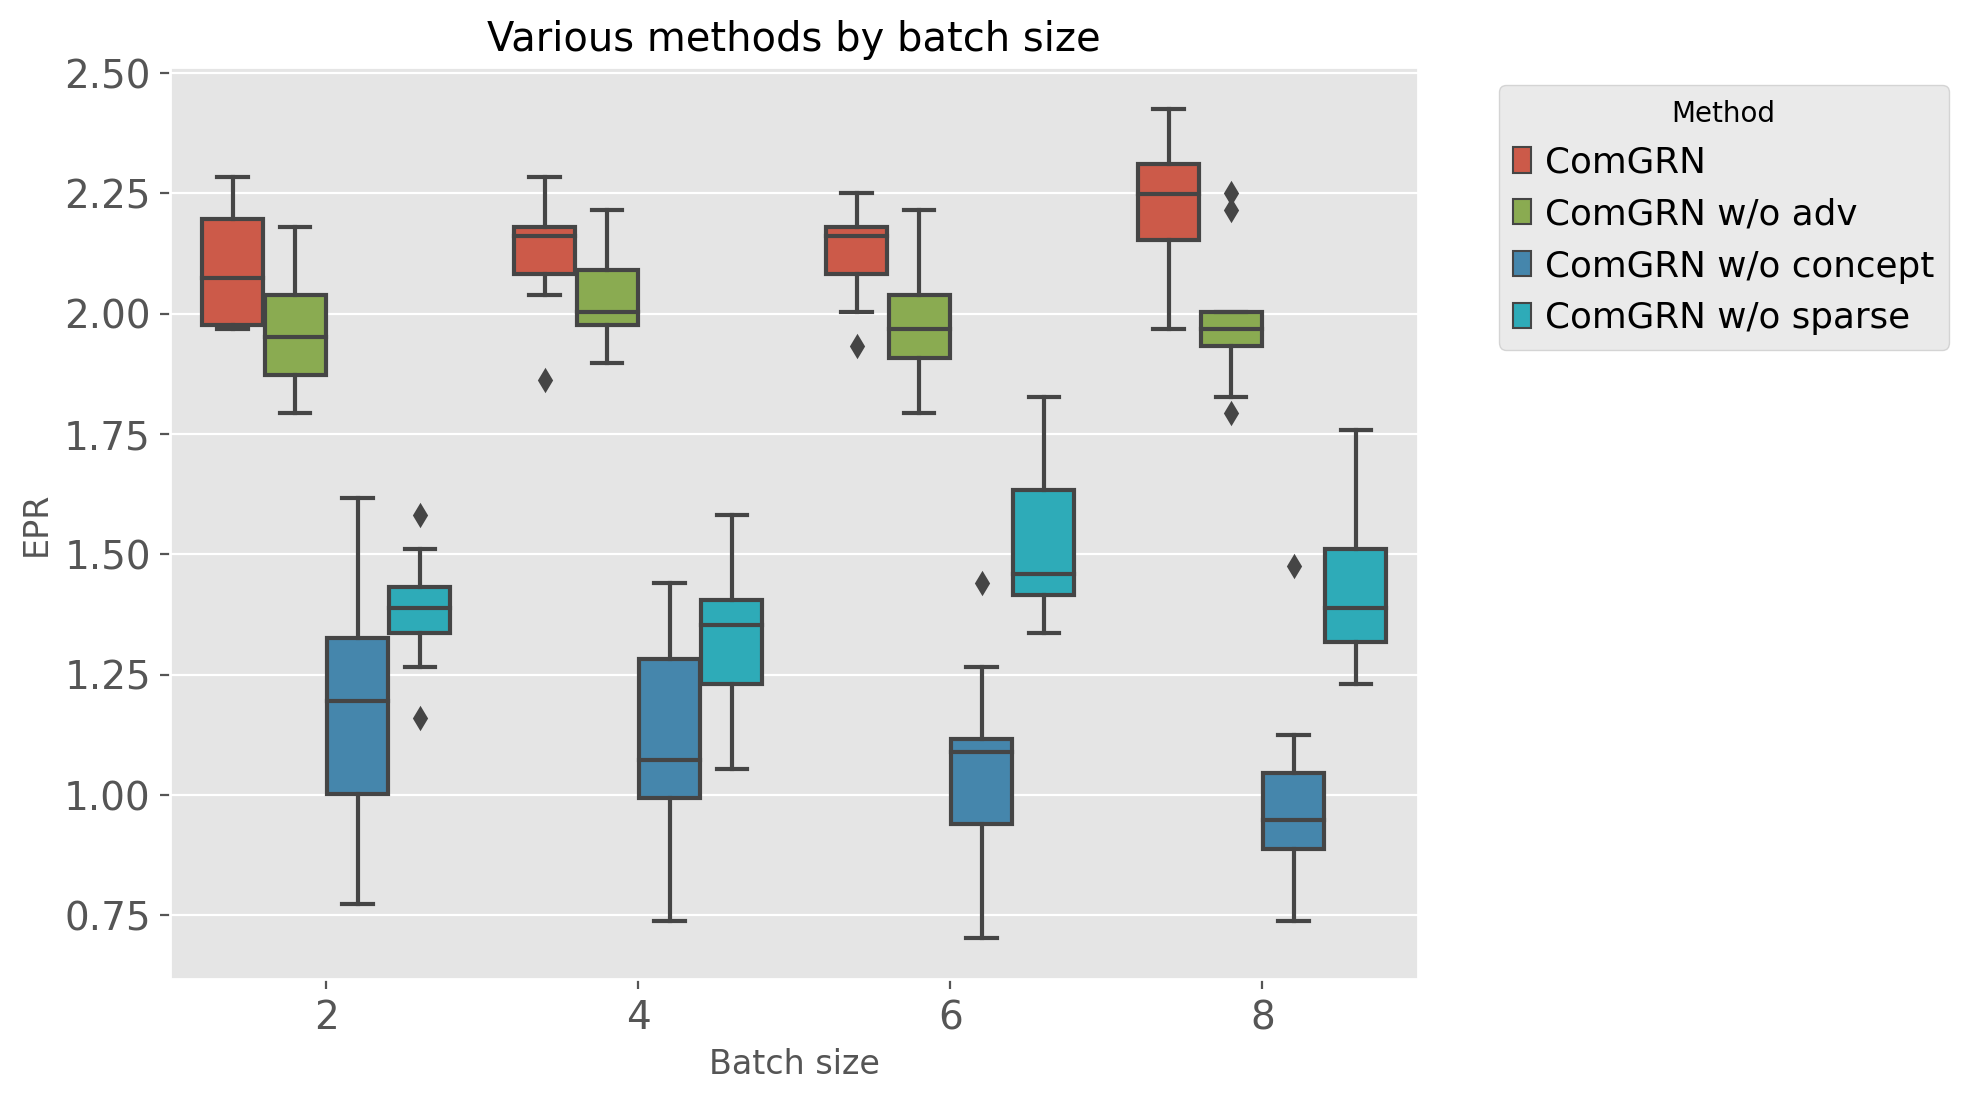

In [18]:
# 将数据整理成DataFrame
data = []
for i, batch in enumerate(batches):
    for ComGRN_val, adv_val, con_val, sparse_val in zip(
        ComGRN_data[i], adv_data[i], con_data[i], sparse_data[i]
    ):
        data.append({
            'Batch': batch,
            'Method': 'ComGRN',
            'Value': ComGRN_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o adv',
            'Value': adv_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o concept',
            'Value': con_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o sparse',
            'Value': sparse_val
        })

df = pd.DataFrame(data)

# 创建箱线图
colors = ['#E24A33', '#8EBA42', '#348ABD', '#17BECF', ]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Batch', y='Value', hue='Method', data=df, width=0.8, palette=colors)
plt.title('Various methods by batch size')
plt.xlabel('Batch size')
plt.ylabel('EPR')
plt.legend(title='Method')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig('')
plt.show()

In [19]:
batches = [2, 4, 6, 8]
ComGRN_data = [
    [2.1838,2.1918,2.1042,2.3587,2.3378,2.211,2.0129,2.2239,2.0936,2.257],
    [2.0914,2.1948,2.1533,2.1991,2.3937,2.2394,1.9032,2.1002,2.0955,2.0731],
    [2.2578,2.3756,2.2686,2.2185,2.5999,2.415,2.0631,2.2349,2.2489,2.5076],
    [2.2119,2.3875,2.2907,2.4397,2.3998,2.123,2.0956,2.2942,2.2489,2.1654]
]

adv_data = [
    [1.9623,2.0022,1.9647,2.0646,1.9985,1.7196,2.009,2.0185,1.9586,2.0275],
    [1.9676,1.9254,2.0624,2.1448,2.162,1.8421,1.912,2.1018,1.847,1.8278],
    [2.1521,2.1968,2.0299,2.172,2.2453,2.0784,2.0361,2.0375,2.0017,2.1781],
    [1.9367,1.9942,1.8619,1.744,1.731,1.8105,1.8469,1.9667,1.7897,1.9475]
]

con_data = [
    [1.166,1.1141,1.281,1.4212,1.1512,0.9389,1.2484,1.1161,1.1396,1.4285],
    [1.0497,1.0107,1.3261,1.2806,1.192,0.8803,1.056,0.9269,1.0375,1.3649],
    [0.9642,1.5669,1.2372,1.173,1.092,1.0147,1.1989,0.9287,0.9928,1.2267],
    [0.9284,1.0909,1.2882,1.328,1.0631,0.9974,1.0577,0.9463,0.9523,1.1145]
]

sparse_data = [
    [1.4063,1.3985,1.3429,1.3303,1.2756,1.4387,1.3046,1.1756,1.2409,1.1164],
    [1.4975,1.2883,1.4626,1.2827,1.4329,1.3491,1.3207,1.2045,1.3559,1.1548],
    [1.5897,1.8337,1.758,1.3867,1.4496,1.4594,1.5188,1.3233,1.4608,1.3441],
    [1.3989,1.2639,1.4903,1.3326,1.3234,1.4237,1.453,1.2934,1.4425,1.3248]
]

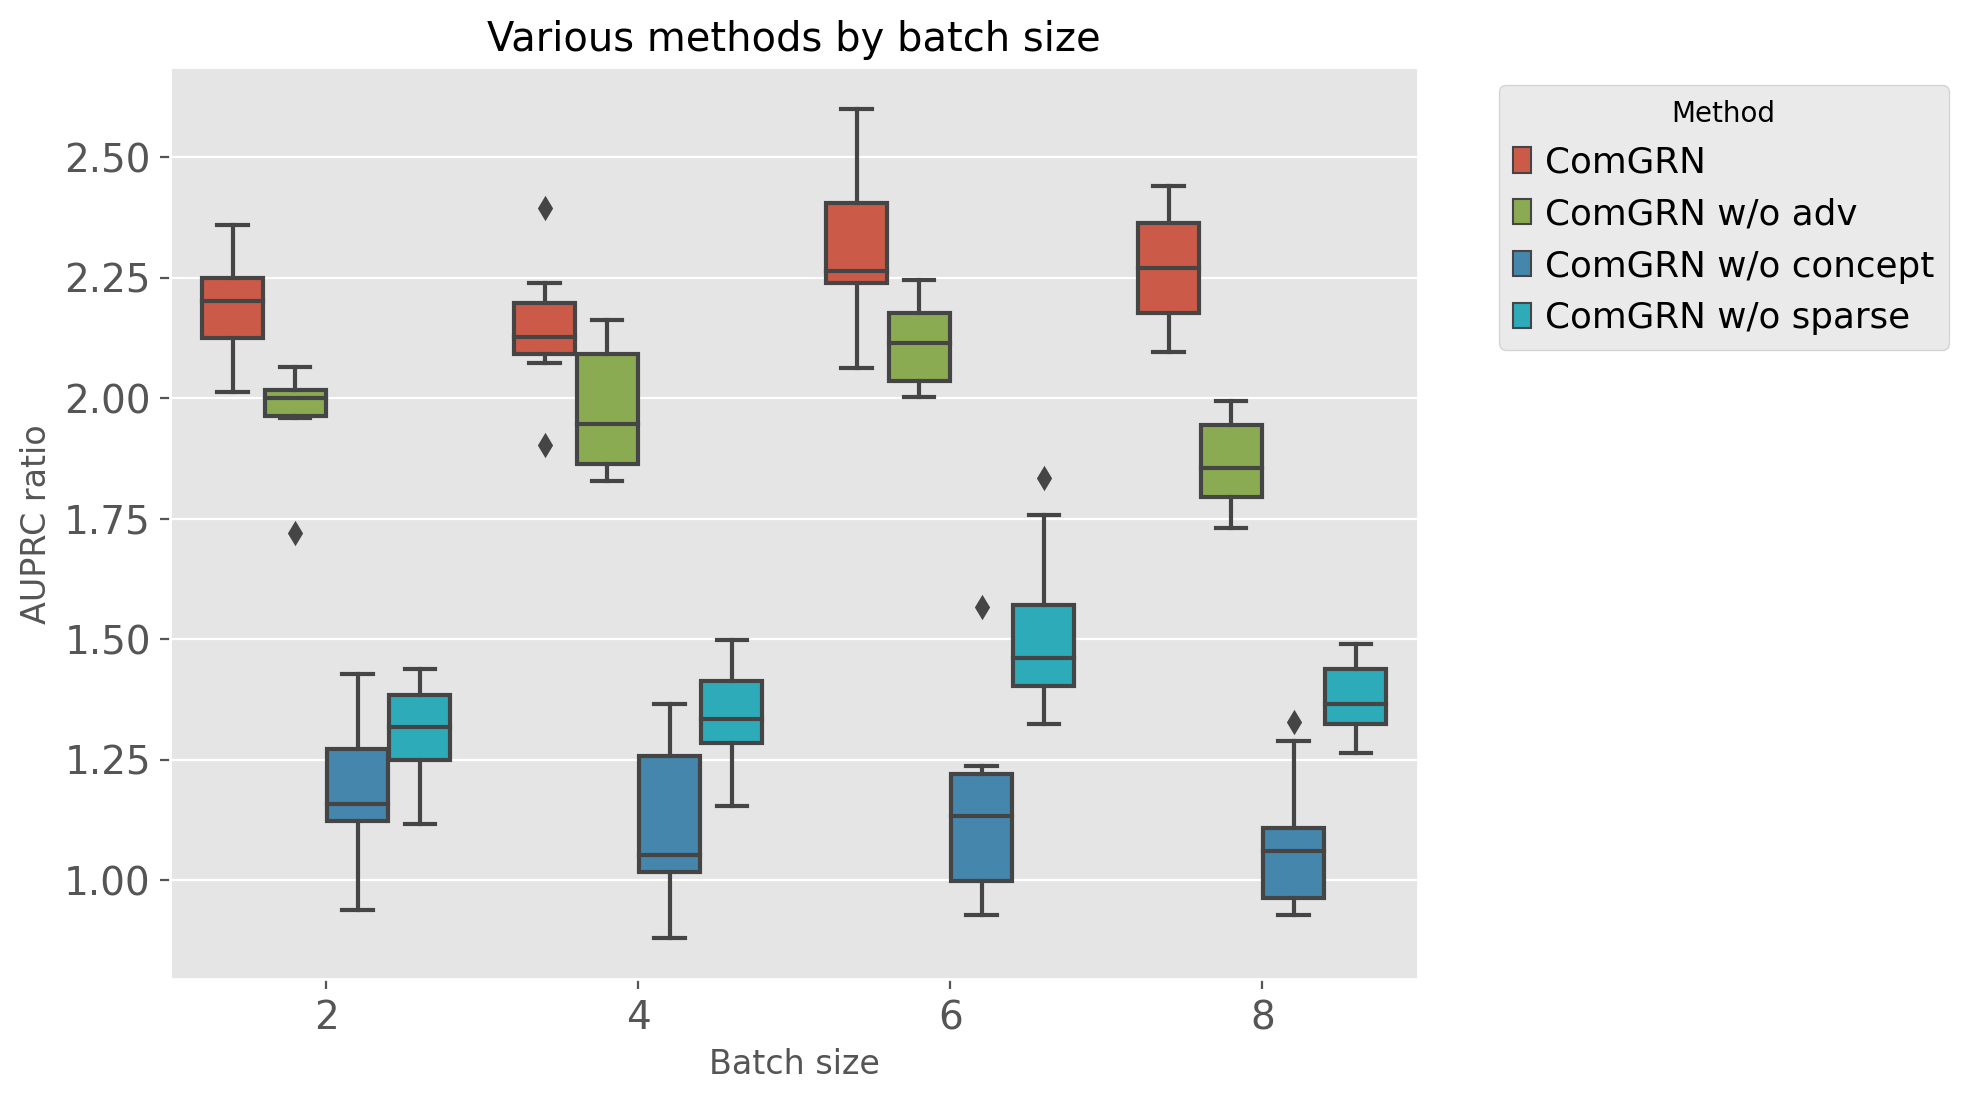

In [20]:
# 将数据整理成DataFrame
data = []
for i, batch in enumerate(batches):
    for ComGRN_val, adv_val, con_val, sparse_val in zip(
        ComGRN_data[i], adv_data[i], con_data[i], sparse_data[i]
    ):
        data.append({
            'Batch': batch,
            'Method': 'ComGRN',
            'Value': ComGRN_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o adv',
            'Value': adv_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o concept',
            'Value': con_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o sparse',
            'Value': sparse_val
        })

df = pd.DataFrame(data)

# 创建箱线图
colors = ['#E24A33', '#8EBA42', '#348ABD', '#17BECF', ]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Batch', y='Value', hue='Method', data=df, width=0.8, palette=colors)
plt.title('Various methods by batch size')
plt.xlabel('Batch size')
plt.ylabel('AUPRC ratio')
plt.legend(title='Method')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig('')
plt.show()

In [21]:
batches = [2, 4, 6, 8]
ComGRN_data = [
    [0.7099,0.7195,0.7247,0.7465,0.7525,0.7276,0.7123,0.7364,0.7232,0.7525],
    [0.707,0.7226,0.7188,0.7311,0.7571,0.7401,0.7008,0.7236,0.7296,0.7336],
    [0.7267,0.7461,0.7386,0.7462,0.7584,0.749,0.7089,0.7309,0.7304,0.7537],
    [0.7276,0.7615,0.7391,0.7573,0.7507,0.727,0.7037,0.7376,0.748,0.7537]
]

adv_data = [
    [0.6979,0.6697,0.7036,0.7086,0.7034,0.664,0.7119,0.7277,0.428,0.7182],
    [0.6989,0.6854,0.7109,0.7071,0.7341,0.6863,0.7094,0.7166,0.6838,0.6871],
    [0.7189,0.698,0.7058,0.7274,0.7252,0.7099,0.7128,0.6952,0.6918,0.7062],
    [0.7107,0.7301,0.7048,0.6863,0.6725,0.72,0.6966,0.726,0.6683,0.7347]
]

con_data = [
    [0.5137,0.4214,0.5312,0.5896,0.5194,0.4698,0.5916,0.4736,0.491,0.5347],
    [0.5152,0.5005,0.587,0.571,0.5358,0.4582,0.5214,0.4769,0.4721,0.5746],
    [0.4989,0.5813,0.513,0.5295,0.5239,0.521,0.5447,0.4639,0.4543,0.5085],
    [0.4636,0.5051,0.5672,0.5918,0.5099,0.5125,0.5253,0.4755,0.478,0.52]
]

sparse_data = [
    [0.598,0.57,0.594,0.5838,0.5691,0.5862,0.5565,0.5445,0.5471,0.5477],
    [0.5676,0.5484,0.5687,0.5573,0.5807,0.5975,0.5552,0.543,0.5715,0.5312],
    [0.6433,0.6369,0.6226,0.5936,0.5892,0.6101,0.6466,0.5497,0.606,0.5775],
    [0.5787,0.5747,0.5919,0.5916,0.5511,0.5847,0.58,0.5661,0.5943,0.5798]
]

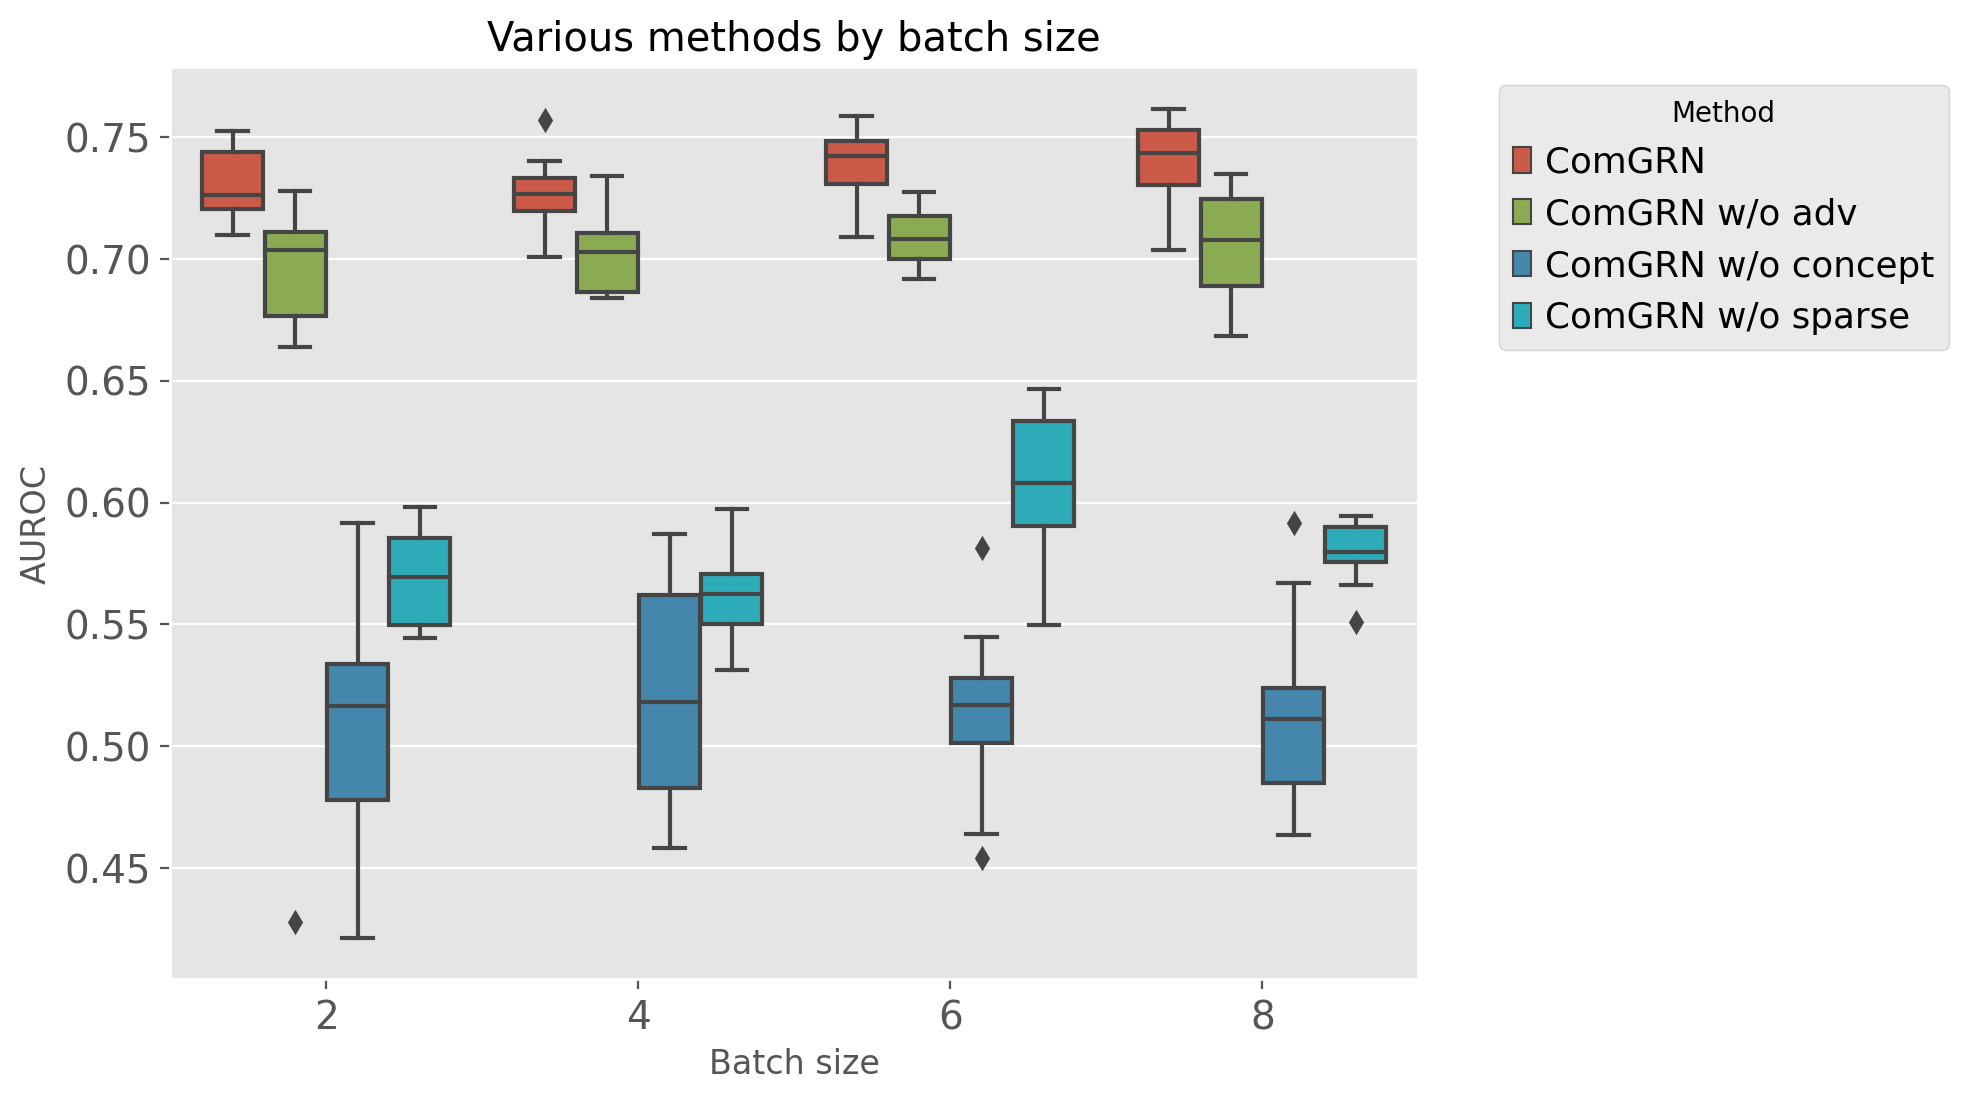

In [22]:
# 将数据整理成DataFrame
data = []
for i, batch in enumerate(batches):
    for ComGRN_val, adv_val, con_val, sparse_val in zip(
        ComGRN_data[i], adv_data[i], con_data[i], sparse_data[i]
    ):
        data.append({
            'Batch': batch,
            'Method': 'ComGRN',
            'Value': ComGRN_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o adv',
            'Value': adv_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o concept',
            'Value': con_val
        })
        data.append({
            'Batch': batch,
            'Method': 'ComGRN w/o sparse',
            'Value': sparse_val
        })

df = pd.DataFrame(data)

# 创建箱线图
colors = ['#E24A33', '#8EBA42', '#348ABD', '#17BECF', ]
plt.figure(figsize=(8, 6))
sns.boxplot(x='Batch', y='Value', hue='Method', data=df, width=0.8, palette=colors)
plt.title('Various methods by batch size')
plt.xlabel('Batch size')
plt.ylabel('AUROC')
plt.legend(title='Method')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig('')
plt.show()